#07. Exp07- 사진 스티커 붙이기

# 목차

project1: 고양이 수염 스티커
- 1.사진준비
- 2.얼굴 검출 (face detection)
- 3.얼굴 랜드마크 (face landmark)
- 4.스티커 적용 위치 확인
- 5.스티커 적용


회고


# 1.사진준비

In [1]:
# import library

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import glob
print("🌫🛸")

🌫🛸


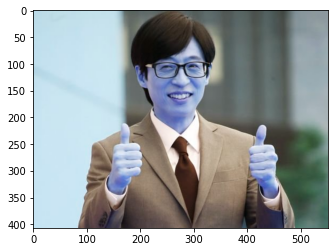

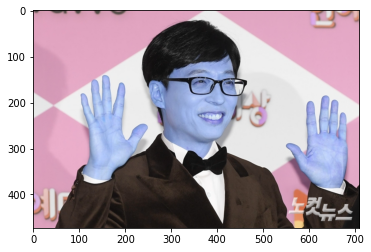

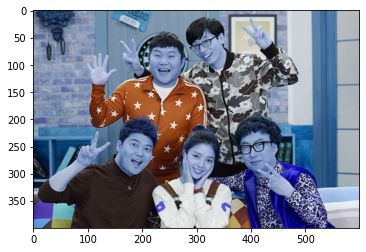

In [2]:
# read data

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

my_image_path = '/content/drive/MyDrive/Aiffel_data/Exp7_cv2_photo'

bgrs= []
shows= []

for file in glob.iglob(my_image_path+'/*.jpeg'):
  # img = np.array(Image.open(file),dtype=np.int32)
  img_bgr = cv2.imread(file)    # OpenCV로 이미지를 불러옵니다
  img_show = img_bgr.copy() 
  plt.imshow(img_bgr)
  plt.show()

  bgrs.append(img_bgr)
  shows.append(img_show)



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


10
10
10


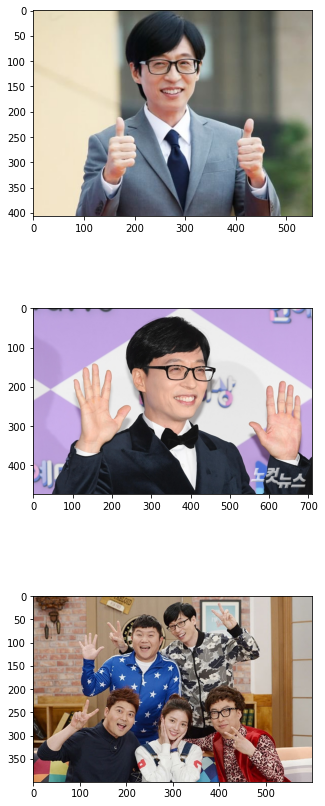

In [4]:
# convert color

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
# (OpenCv : BGR , matlplotlib, dilib : RGB)

rgbs = []
for img_bgr in bgrs:
  print('10')

  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  rgbs.append(img_rgb)

fig, axes = plt.subplots(3, figsize=(5, 15))
axes[0].imshow(rgbs[0])
axes[1].imshow(rgbs[1])
axes[2].imshow(rgbs[2])

plt.show()

#2.얼굴 검출 (face detection)

In [5]:
# declare 'detector' (:using dlib)

detector_hog = dlib.get_frontal_face_detector()
print(detector_hog)
print("🌫🛸")

🌫🛸


In [6]:
# exatract 'bounding box' (:using detector)

boxes = []
for img_rgb in rgbs:
  dlib_rects = detector_hog(img_rgb, 3)   # (image, num of image pyramid)
  print("🌫🛸")
  boxes.append(dlib_rects)



🌫🛸
🌫🛸
🌫🛸


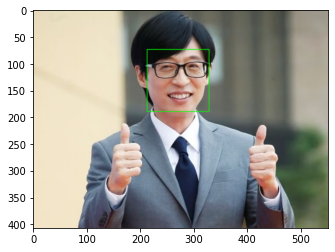

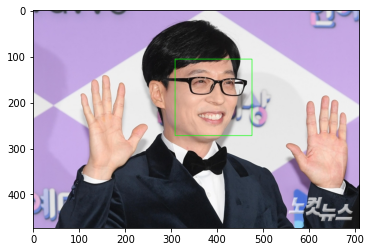

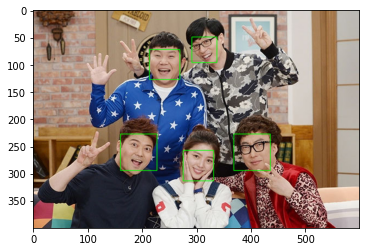

In [7]:

nemos = []
for dlib_rects, img_show in zip(boxes, shows):
  for dlib_rect in dlib_rects:
      l = dlib_rect.left()
      t = dlib_rect.top()
      r = dlib_rect.right()
      b = dlib_rect.bottom()

      cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 1, lineType=cv2.LINE_AA)

  img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img_show_rgb)
  plt.show()

  nemos.append(img_show_rgb)

#3.얼굴 랜드마크 (face landmark)

<!-- 
<img src="/content/drive/MyDrive/Aiffel_data/Exp7_cv2_photo/landmarks.png" width = "50%" height ="50%"> -->






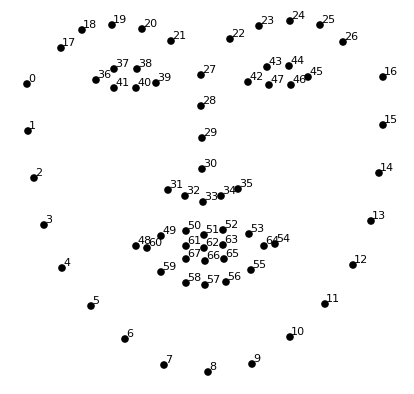

In [8]:
model_path = '/content/drive/MyDrive/Aiffel_data/Exp7_cv2_photo/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [9]:
  # detect and save landmarks

lms = []

for img_rgb, dlib_rects in zip(rgbs, boxes):

    list_landmarks = []

  # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    print(list_points)

    print(len(list_landmarks[0]))

    lms.append(list_landmarks)



[(213, 105), (213, 121), (214, 137), (216, 152), (223, 166), (234, 179), (246, 189), (261, 197), (277, 198), (292, 194), (302, 183), (310, 172), (317, 160), (321, 147), (322, 133), (322, 119), (322, 106), (231, 94), (240, 87), (250, 86), (260, 88), (269, 92), (283, 91), (291, 88), (299, 85), (308, 87), (313, 92), (277, 105), (278, 115), (279, 125), (279, 136), (264, 140), (271, 143), (278, 145), (284, 143), (290, 140), (243, 106), (249, 104), (255, 104), (260, 107), (254, 107), (248, 107), (288, 106), (294, 103), (300, 103), (306, 105), (301, 106), (295, 106), (250, 158), (260, 153), (270, 151), (277, 153), (283, 151), (291, 153), (299, 157), (292, 167), (284, 172), (277, 174), (270, 173), (260, 169), (253, 159), (270, 156), (277, 156), (283, 155), (296, 157), (284, 165), (277, 166), (270, 166)]
68
[(280, 156), (283, 181), (285, 205), (291, 227), (303, 246), (324, 260), (346, 272), (368, 280), (388, 281), (404, 276), (414, 262), (424, 246), (432, 230), (437, 213), (440, 196), (439, 180

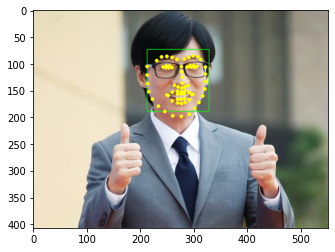

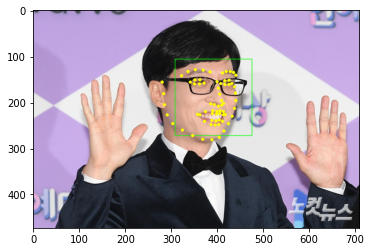

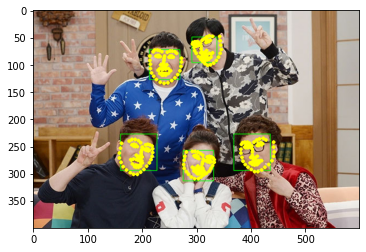

In [10]:
# showing landmarks 


isrgbs =[]
for img_show, list_landmarks in zip(shows,lms):
  for landmark in list_landmarks:
      for point in landmark:
          cv2.circle(img_show, point, 2, (0, 255, 255), 2 )

  img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img_show_rgb)
  plt.show()

  isrgbs.append(img_show_rgb)

  

#4.스티커 적용 위치 확인

In [11]:
# coordinate checking

print(list_landmarks)
print(dlib_rects) 

xs = []
ys = []
ws = []
hs = []

# in the case of a photo with a number of faces 
for dlib_rects, list_landmarks in zip(boxes, lms):
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print (landmark[30]) # 코의 index는 30 입니다

        x = landmark[30][0]
        y = landmark[30][1] 
        w = h = dlib_rect.width()
        
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))

        xs.append(x)
        ys.append(y)
        ws.append(w)
        hs.append(h)

[[(162, 244), (160, 253), (158, 262), (158, 271), (161, 279), (165, 287), (171, 293), (178, 298), (184, 301), (191, 301), (197, 297), (203, 292), (208, 286), (213, 280), (216, 274), (218, 268), (219, 261), (176, 240), (181, 237), (187, 237), (193, 239), (197, 243), (206, 247), (210, 246), (214, 247), (218, 249), (219, 254), (200, 251), (199, 256), (198, 260), (198, 264), (189, 266), (192, 268), (195, 269), (197, 269), (200, 269), (181, 247), (185, 246), (188, 247), (191, 250), (187, 250), (184, 249), (204, 255), (208, 254), (211, 255), (213, 257), (211, 258), (207, 257), (179, 274), (184, 273), (190, 273), (193, 274), (195, 274), (199, 276), (200, 280), (197, 286), (193, 288), (189, 288), (186, 287), (182, 282), (180, 275), (189, 274), (192, 275), (195, 276), (198, 280), (194, 285), (191, 285), (188, 284)], [(281, 260), (278, 268), (277, 275), (276, 283), (277, 290), (281, 296), (285, 301), (290, 306), (296, 309), (303, 309), (308, 306), (313, 302), (318, 299), (323, 295), (326, 290), 

In [12]:
# read and resize sticker image

stickers = []
for w,h in zip(ws,hs):
  sticker_path = '/content/drive/MyDrive/Aiffel_data/Exp7_cv2_photo/cat-whiskers.png'
  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다

  img_sticker = cv2.resize(img_sticker, (w,h))
  print (img_sticker.shape)

  print(type(img_sticker))

  stickers.append(img_sticker)




(117, 117, 3)
<class 'numpy.ndarray'>
(168, 168, 3)
<class 'numpy.ndarray'>
(68, 68, 3)
<class 'numpy.ndarray'>
(57, 57, 3)
<class 'numpy.ndarray'>
(57, 57, 3)
<class 'numpy.ndarray'>
(47, 47, 3)
<class 'numpy.ndarray'>
(68, 68, 3)
<class 'numpy.ndarray'>


In [13]:
len(stickers)

7

In [14]:
# coordinate adjusting

rfxs = []
rfys = []
for x, y, w, h in zip(xs, ys, ws, hs):
  refined_x = x - w // 2
  refined_y = y - h // 2
  print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

  rfxs.append(refined_x)
  rfys.append(refined_y)


(x,y) : (221,78)
(x,y) : (325,112)
(x,y) : (164,230)
(x,y) : (281,259)
(x,y) : (211,68)
(x,y) : (286,53)
(x,y) : (368,232)


In [15]:
# exception handling 

# rfxs = list(range(0,3))
# rfys = list(range(0,3))

# for index, (img_sticker, refined_x, refined_y) in enumerate(zip(stickers, rfxs, rfys)):
#   if refined_x < 0: 
#       img_sticker = img_sticker[:, -refined_x:]
#       refined_x = 0
#   if refined_y < 0:
#       img_sticker = img_sticker[-refined_y:, :] 
#       refined_y = 0

#   stickers[index] = img_sticker
#   rfxs[index] = refined_x
#   rfys[index] = refined_y

#   print ('(x,y) : (%d,%d)'%(refined_x, refined_y))




#5. 스티커 적용

In [16]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다

areas = []
for img_show, img_sticker, refined_x, refined_y in zip(shows, stickers, rfxs, rfys):
  sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
  print("슝~")

  areas.append(sticker_area)


  # stickers = 255(하얀색)이면 원본이미지(T), 아니면 스티커 자체(F)

슝~
슝~
슝~


In [17]:
len(shows), len(stickers), len(rfxs), len(rfys)

(3, 7, 7, 7)

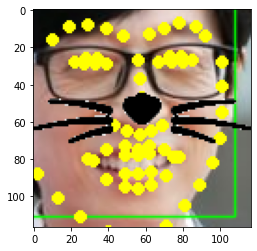

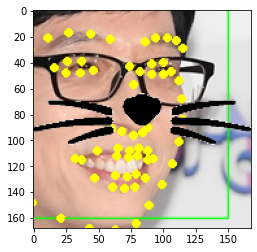

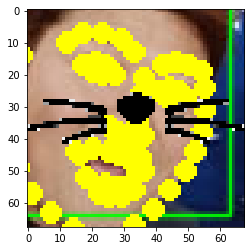

In [18]:
for sticker_area in areas :
  plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
  plt.show()

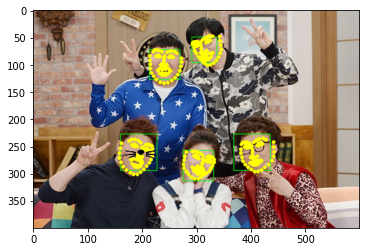

In [19]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

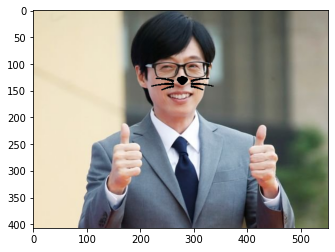

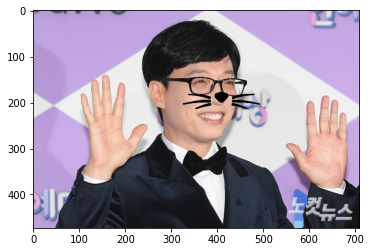

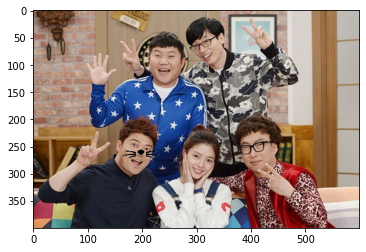

In [20]:


for sticker_area, img_sticker, img_bgr, refined_x, refined_y in zip(areas, stickers, bgrs, rfxs, rfys):

  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
      np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
  plt.show()

  #img1, img2, img3가 있는데 img3는 얼굴이 5개가 존재한다. 
  #그런데 1~3 까지의 얼굴만 출력하고 4~7의 얼굴은 출력 되지 않는다.  
  #그래서 img1 (1개), img2(1개), img(5개)의 스티커를 출력해주도록 조정해야한다. 



In [21]:
# print(len(bgrs))
# type(bgrs)

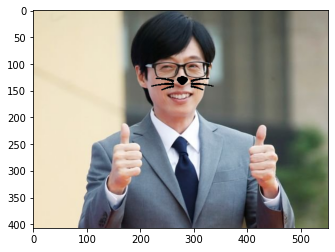

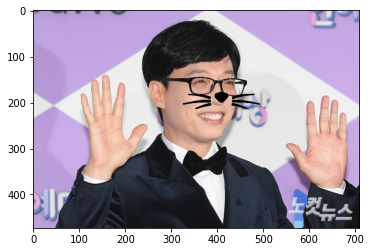

In [22]:
for sticker_area, img_sticker, img_bgr, refined_x, refined_y in zip(areas, stickers, bgrs[0:2], rfxs, rfys):

  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
      np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
  plt.show()

# img_bgr = bgrs[0:2]로 한정해서 img1, img2만 우선 출력하고 스티커 적용


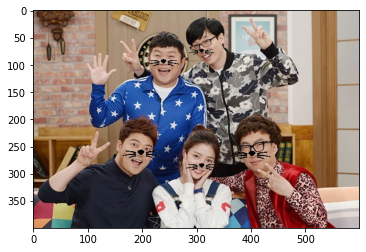

In [23]:

img_bgr= bgrs[2]

for  img_sticker, refined_x, refined_y in zip(stickers[2:], rfxs[2:], rfys[2:]):

  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
      np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# img_bgr = bgrs[2] 로 지정해서 문제의 3번째 사진만 따로 출력
# 3~7번째 얼굴 좌표와 스티커 좌표 출력을 위해 각리스트 [2:] 슬라이싱 지정
# plt.imshow(), plt.show() 를 for문 밖으로 빼줌으로서 3번째 사진이 1번만 출력되도록


# 회고

### - 이번 프로젝트에서 **어려웠던 점**.

  img1, img2, img3가 있는데 img1,2는 각하나 img3는 얼굴이 5개로 총  7개의 얼굴을 인식해야한다. 
  그런데 현제 1,2,3 까지의 얼굴만 출력하고 4,5,6,7의 얼굴은 출력 되지 않는다.  
  그래서 img1 (1개), img2(1개), img(4개)의 스티커를 출력해주 주도록 조정해야한다.
  

### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

**알아낸 점**


* np.where(condition, T, F)
* 0 0 0 검정/ 255 255 255 하얀색
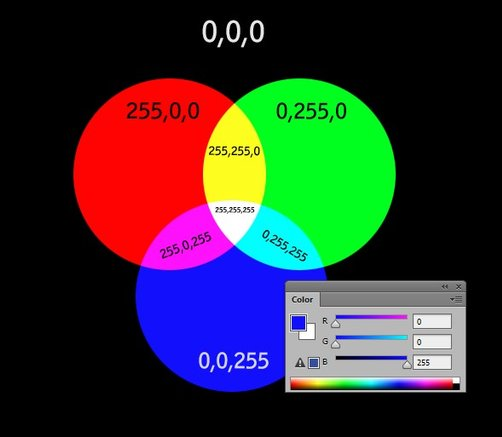


### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.



>#### **루브릭평가 지표**
>|번호|평가문항|상세기준|
>|:---:|---|---|
>|1| 자기만의 카메라앱 기능 구현을 완수하였다. |원본에 스티커 사진이 정상적으로 합성되었다.|
>|2| 스티커 이미지를 정확한 원본 위치에 반영하였다.|  스티커 이미지를 정확한 원본 위치에 반영하였다.	정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다. |
>|3|카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.|얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.|

>첫번째 사진: 유재석님이 정면을 보고 있어서 제대로 스티커가 적용되었다.

>두번째 사진: 약간 측면을 바라 보고 있지만 정면과 크게 각도가 차이 나지 않아 큰 문제 없이 스티커가 출력 되었다.

>세번째 사진: 5명의 얼굴을 인식하고 각기 다른 각도의 얼굴을 고려하여 스티커를 적용해야하는데 **1명의 얼굴에만 스티커가 적용**되고 또 **각도에 따른 스티커 적용이 무시**되었다.
또 처음에 박명수님 얼굴을 인식하지 못해서 pyramid를 3으로 조정 


## 문제점 해결 방법

###1. 처음에 박명수님 얼굴을 인식하지 못함
* pyramid를 3으로 조정 해서 해결



###2. img3 에 5개 얼굴에 스티커 출력하기

<img1, img2 출력, 스티커 적용>
* img_bgr = bgrs[0:2]로 한정해서 img1, img2만 우선 출력하고 스티커 적용

<img3 따로 출력, 스티커 적용>
* img_bgr = bgrs[2] 로 지정해서 문제의 3번째 사진만 따로 출력
* 3~7번째 얼굴 좌표와 스티커 좌표 출력을 위해 각리스트 [2:] 슬라이싱 지정
* plt.imshow(), plt.show() 를 for문 밖으로 빼줌으로서 3번째 사진이 1번만 출력되도록




### - **자기 다짐**

* 제출후 리스트 형식이 아닌 다른 함수 형식으로 코드를 다시 구성해보기 



### - **참고**
